In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'used_cars.csv'  # Path to your dataset
data = pd.read_csv(file_path)

In [3]:
# Inspect the dataset
print("Dataset Preview:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Preview:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed 

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [5]:
# Drop rows or fill missing values (as needed)
data = data.dropna()  # Drop rows with missing values

In [6]:
# Feature selection (adjust according to dataset structure)
# Replace 'Price' with the actual column name for the car price
target_column = 'price'  
features = data.drop(columns=[target_column])
target = data[target_column]

In [7]:
# Convert categorical features to numerical (if needed)
features = pd.get_dummies(features, drop_first=True)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [9]:
# Handle price column (assuming it's named 'price' and contains strings like '$27,500')
if 'price' in data.columns:
    data['price'] = data['price'].replace(r'[\$,]', '', regex=True).astype(float)  # Use raw string (r'...')
    # Convert prices to INR (adjust conversion rate as needed)
    usd_to_inr = 82
    data['price'] = data['price'] * usd_to_inr


In [10]:
# Check for missing values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())


Missing Values Before Handling:
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [11]:
# Drop rows with missing values or fill them
data = data.dropna()  # Alternatively, you can use data.fillna()

In [12]:
# Feature selection
target_column = 'price'  # Replace 'price' with the actual target column if different
features = data.drop(columns=[target_column])
target = data[target_column]

In [13]:
# Convert categorical features to numerical (if applicable)
features = pd.get_dummies(features, drop_first=True)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [15]:
# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Predictions
y_pred = model.predict(X_test)

In [17]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared Score: {r2}")



Mean Squared Error: 93287714735265.83
R-squared Score: 0.0525784775756738


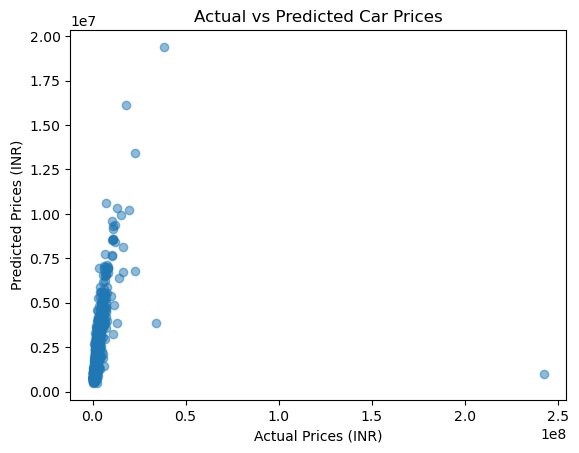

In [18]:
# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices (INR)')
plt.ylabel('Predicted Prices (INR)')
plt.title('Actual vs Predicted Car Prices')
plt.show()

In [39]:
def predict_car_price():
    print("\nEnter the details of the car to predict its price:")

    # Ask for a few key features
    car_age = float(input("Enter the car's age (in years): "))
    kms_driven = float(input("Enter the kilometers driven: "))
    fuel_type = input("Enter the fuel type (Petrol/Diesel/Other): ").strip().lower()
    transmission = input("Enter the transmission type (Manual/Automatic): ").strip().lower()

    # Create a dictionary with the user input and default values for other features
    car_details = {
        'age': car_age,
        'kms_driven': kms_driven,
        'fuel_type_diesel': 1 if fuel_type == 'diesel' else 0,
        'fuel_type_petrol': 1 if fuel_type == 'petrol' else 0,
        'transmission_manual': 1 if transmission == 'manual' else 0,
    }

    # Convert user input to DataFrame
    user_input = pd.DataFrame(car_details, index=[0])

    # Align user input columns with the training data
    user_input = user_input.reindex(columns=features.columns, fill_value=0)

    # Predict the price
    predicted_price = model.predict(user_input)[0]
    print(f"\nPredicted Car Price: ₹{predicted_price:,.2f}")


In [41]:
predict_car_price()


Enter the details of the car to predict its price:


Enter the car's age (in years):  10
Enter the kilometers driven:  110000
Enter the fuel type (Petrol/Diesel/Other):  Petrol
Enter the transmission type (Manual/Automatic):  Manual



Predicted Car Price: ₹2,086,722.88
